
## ESG Reporting: Supply Chain Emission 
#### Sustainability Data Science Project 
#### Abu Kibria, PhD 
#### NC State University   

   


In [82]:
import pandas as pd


### Shipped Order Lines Data 

In [83]:
dt_line= pd.read_csv("order_lines.csv", index_col=0)
print("{:,} order lines of the company".format(len(dt_line)))
dt_line.head()

5,208 order lines of the company


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros
112,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47
14485,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03
14486,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45
14487,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45
14488,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16


### Master Data 

In [84]:
dt_umc= pd.read_csv("uom_conversions.csv", index_col=0)
print("{:,} Unit of Measure Conversions".format(len(dt_umc)))

557 Unit of Measure Conversions


In [85]:
# Join data frames 

dt_join= dt_line.copy()
cols_join= ["Item Code"]
dt_join= pd.merge(dt_join, dt_umc, on= cols_join, how= 'left', suffixes= ('', '_y'))
dt_join.drop(dt_join.filter(regex='_y$').columns.tolist(), axis=1, inplace=True)
print("{:,} records of data".format(len(dt_join)))
dt_join.head()                                                     

5,208 records of data


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200


### Distance Data 

In [86]:
dt_dst = pd.read_csv("distances.csv", index_col = 0)
# Location
dt_dst['Location'] = dt_dst['Customer Country'].astype(str) + ', ' + dt_dst['Customer City'].astype(str)
dt_dst.head()

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location
19,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES"
610,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE"
676,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF"
682,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE"
1375,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL"


#### City's GPS locations

In [87]:
dt_gps= pd.read_csv('gps_locations.csv', index_col= 0).round(2)
print ('{:,} Locations'.format(len(dt_gps)))
dt_gps

19 Locations


,Location,GPS 1,GPS 2
867,"BULGARIA, DOLNI BOGROV",42.70,23.49
1087,"FRANCE, AUBROMETZ",50.30,2.18
1153,"FRANCE, BELLEVILLE",48.87,2.39
1371,"FRANCE, CLICHY CEDEX",48.90,2.30
1534,"FRANCE, GAEL",48.12,-2.23
1576,"FRANCE, GRETZ ARMAINVILLIERS",48.75,2.73
1604,"FRANCE, HERLIN LE SEC",50.35,2.33
1767,"FRANCE, LES ANGLES",42.58,2.05
1784,"FRANCE, LEVALLOIS PERRET",48.89,2.29
1836,"FRANCE, MACON",48.88,2.28


### Data Processing for Analysis

#### Merge Distance Data with GPS points 

#### Final Join for data file 

In [88]:
dt_dst = pd.merge(dt_dst, dt_gps, on='Location', how='left', suffixes=('', '_y'))
dt_dst.drop(dt_dst.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
dt_dst

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.58,2.05
1,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54
2,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.30,10.31
3,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE",48.87,2.39
4,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL",48.62,2.60
5,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,295.165,0.0,0.0,0.0,"FRANCE, LEVALLOIS PERRET",48.89,2.29
6,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5293132-32,FRANCE,HERLIN LE SEC,353.590,0.0,0.0,0.0,"FRANCE, HERLIN LE SEC",50.35,2.33
7,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003269-69,FRANCE,MACON,478.723,0.0,0.0,0.0,"FRANCE, MACON",48.88,2.28
8,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003474-74,FRANCE,ORLY,287.110,0.0,0.0,0.0,"FRANCE, ORLY",48.74,2.40
9,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003476-76,FRANCE,VITRY SUR SEINE,284.851,0.0,0.0,0.0,"FRANCE, VITRY SUR SEINE",48.79,2.40


### Join line data file with distance data file on conditions 

In [89]:
cols_join= ['Warehouse Code', 'Customer Code']
dt_join= pd.merge(dt_join, dt_dst, on= cols_join, how = 'left', suffixes= ('', '_y'))
dt_join.drop(dt_join.filter(regex= '_y$').columns.tolist(),axis=1, inplace= True)
print('{:,}records'.format(len(dt_join)))
dt_join['KG']= dt_join['Units'] * dt_join['Conversion Ratio']
dt_join

5,208records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,...,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2,KG
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,...,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.58,2.05,113.168
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,8.000
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,12.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,84,802065-65,80.0,72.96,0.02200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,1.760
5204,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,85,942082-82,200.0,391.88,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,6.400
5205,2021-10-28 00:00:00.000,10-2021,3403434,5397843-43,21089497,86,8022922-22,400.0,581.40,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,12.800
5206,2021-11-01 00:00:00.000,10-2021,3403434,5340669-69,21004473,1,982884-84,2000.0,2980.00,0.14600,...,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.30,10.31,292.000


#### Calculation of CO2 at order line 

In [90]:
dta_line= dt_join.copy()
dta_line.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,...,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2,KG
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,...,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.58,2.05,113.168
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,8.000
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,...,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,12.800


#### CO2 emission at order line level 

In [91]:
dta_line= dt_join.copy()
dir_co2= dict(zip(['Air', 'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
modes= ['Road', 'Rail', 'Sea', 'Air']
for mode in modes: 
    dta_line['CO2_' + mode]= dta_line['KG'].astype(float)/1000 * dta_line[mode].astype(float) * dir_co2[mode]

dta_line['CO2 total'] = dta_line[['CO2_' + mode for mode in modes]].sum(axis = 1)
dta_line.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,...,Air,Location,GPS 1,GPS 2,KG,CO2_Road,CO2_Rail,CO2_Sea,CO2_Air,CO2 total
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,...,0.0,"FRANCE, LES ANGLES",42.58,2.05,113.168,8.318967,0.0,0.0,0.0,8.318967
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,...,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,8.000,0.216183,0.0,0.0,0.0,0.216183
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,...,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095,0.299818,0.0,0.0,0.0,0.299818
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,...,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,11.095,0.299818,0.0,0.0,0.0,0.299818
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,...,0.0,"FRANCE, SUCY EN BRIE",48.77,2.54,12.800,0.345892,0.0,0.0,0.0,0.345892


#### CO2 emission at order level 

In [92]:
## group by order 
grpby_order= ['Date', 'Month-Year', 
        'Warehouse Code', 'Warehouse Name', 'Warehouse Country', 'Warehouse City',
        'Customer Code', 'Customer Country', 'Customer City','Location', 'GPS 1', 'GPS 2', 
        'Road', 'Rail', 'Sea', 'Air',
        'Order Number']
dt_ordgp= pd.DataFrame(dt_join.groupby(grpby_order)[['Units', 'KG']].sum())
dt_ordgp.reset_index(inplace = True)
dt_ordgp.head()

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,GPS 1,GPS 2,Road,Rail,Sea,Air,Order Number,Units,KG
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",42.58,2.05,765.728,0.0,0.0,0.0,20247100,2.0,113.16800
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",52.30,10.31,856.000,0.0,0.0,0.0,20203388,153.0,2530.32471
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",48.87,2.39,52.694,0.0,0.0,0.0,20203383,128.0,2116.87296
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",48.77,2.54,281.488,0.0,0.0,0.0,20258239,2771.0,71.45232
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",48.89,2.29,295.165,0.0,0.0,0.0,21000061,2125.0,111.95200


#### CO2 emission calculation 

In [93]:
# co2 emission
dir_co2e= dict(zip (['Air', 'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
modes= ['Road', 'Rail', 'Sea', 'Air']
for mode in modes:
    dt_ordgp['CO2 ' + mode]= dt_ordgp['KG'].astype(float)/1000*dt_ordgp[mode].astype(float)*dir_co2e[mode] 
dt_ordgp['CO2 Total']= dt_ordgp[['CO2 ' + mode for mode in modes]].sum(axis=1)
dt_ordgp.head()

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,...,Sea,Air,Order Number,Units,KG,CO2 Road,CO2 Rail,CO2 Sea,CO2 Air,CO2 Total
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",...,0.0,0.0,20247100,2.0,113.16800,8.318967,0.0,0.0,0.0,8.318967
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",...,0.0,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.0,0.0,207.931963
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",...,0.0,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.0,0.0,10.708464
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",...,0.0,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.0,0.0,1.930845
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",...,0.0,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.0,0.0,3.172254


Text(0.5, 1.0, "CO2 Emission by the Consumer's Country")

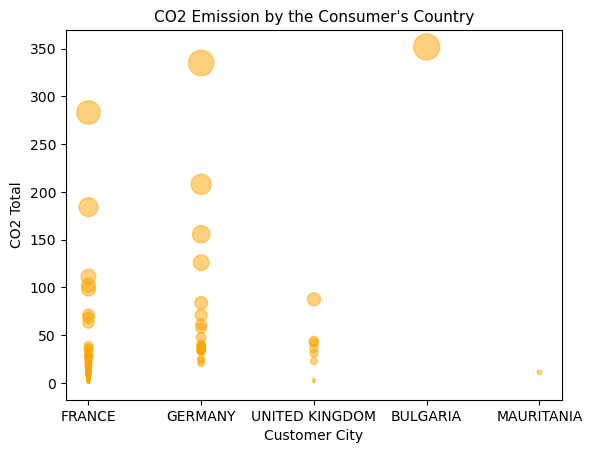

In [94]:
plt.scatter('Customer Country', 'CO2 Total', 
             s='CO2 Total',
             alpha=0.5,
            color= 'orange',
             data=dt_ordgp)
plt.xlabel("Customer City", size=10)
plt.ylabel("CO2 Total", size=10)
plt.title("CO2 Emission by the Consumer's Country", size=11)

In [95]:
import seaborn as sns

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

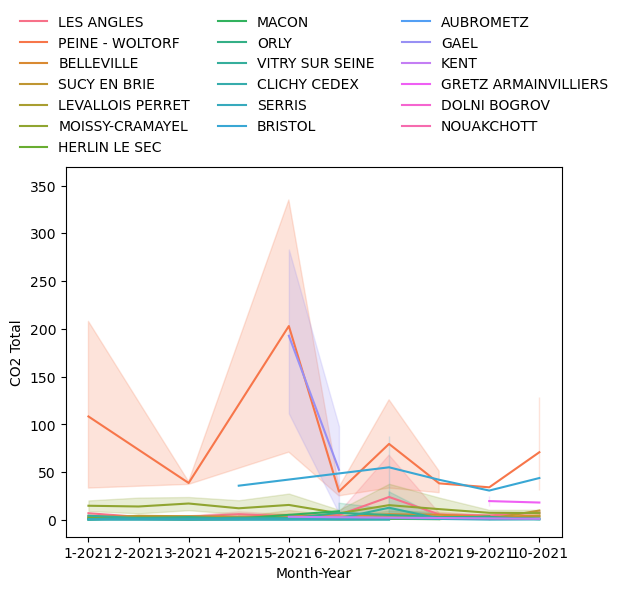

In [96]:
snpt= sns.lineplot(data= dt_ordgp, 
                   x="Month-Year", 
                   y="CO2 Total", 
                   hue="Customer City"
                   )
sns.move_legend(
    snpt, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

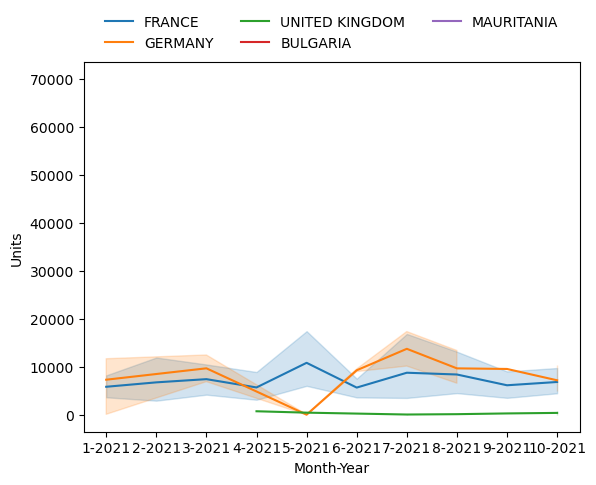

In [97]:
snpt= sns.lineplot(data= dt_ordgp, 
                   x="Month-Year", 
                   y="Units", 
                   hue="Customer Country"
                   )
sns.move_legend(
    snpt, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

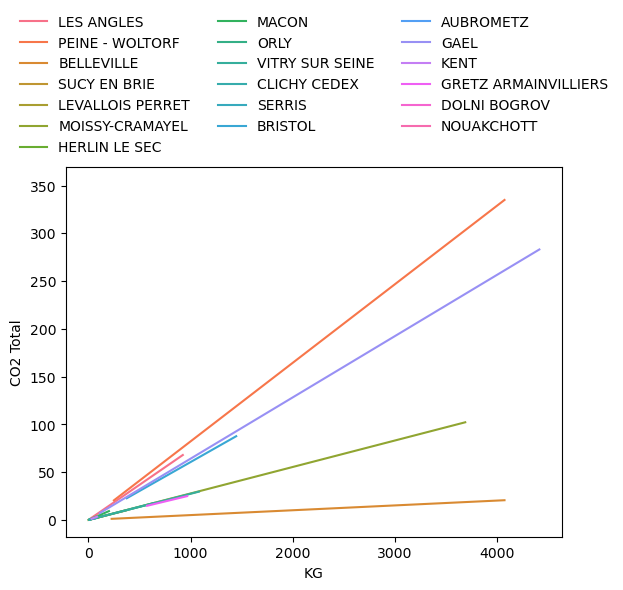

In [98]:
snpt= sns.lineplot(data= dt_ordgp, 
                   x="KG", 
                   y="CO2 Total", 
                   hue="Customer City"
                   )
sns.move_legend(
    snpt, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/akibria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

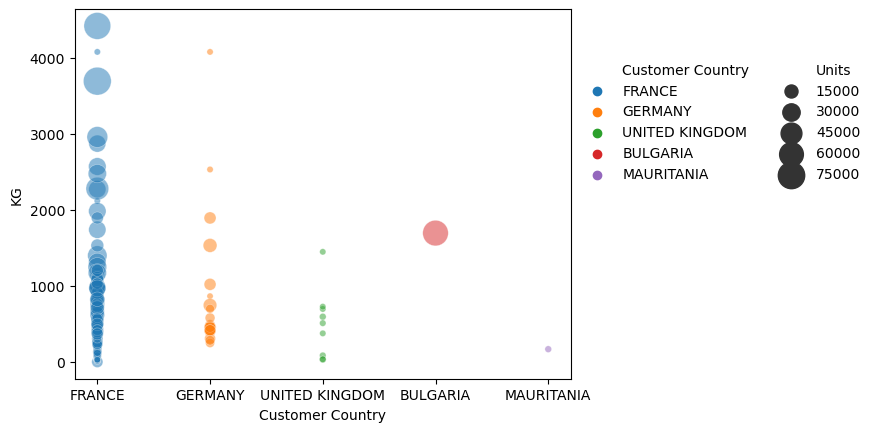

In [99]:
# use the scatterplot function
snp2= sns.scatterplot(data=dt_ordgp, x="Customer Country", y="KG", size="Units", hue="Customer Country", alpha=0.5, sizes=(20, 400))

# show the graph

sns.move_legend(
    snp2, "lower left",
    bbox_to_anchor=(1, .5), ncol=2, title=None, frameon=False,
)